In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathresults = "../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import plotnine
from matplotlib import cm, colormaps
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib

from plotnine import *

# get param set
paramsets =  pd.read_csv('../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
column_names = outputvalsname + paramsets.columns.tolist()
paramsets.drop('theta',inplace=True, axis=1)

df = pd.read_pickle("./cyl10to11_allroots2.pkl")  
viridis = matplotlib.colormaps.get_cmap('viridis')

In [23]:
paramsets.loc[74]

beta_C        0.000520
beta_O        0.261961
C_thres,C     0.071592
C_thres,O     0.037643
DS_W          0.025798
k_C,S        20.895869
k_d,C        24.771896
k_d,O         0.021595
K_L           0.009193
k_O,S        68.279624
k_r,C        25.839485
k_r,O         0.377994
m_max,C       0.017692
m_max,O       0.001246
p_L           0.786735
ro_B          1.344659
u_max,C      16.045104
u_max,O       0.018346
v_max,L       0.016591
Y             0.184762
Y_C           0.117528
Y_O           0.342559
CSS_max       0.217349
k_sorp        0.084765
CL_init      12.127853
CS_init       0.001569
Name: 74, dtype: float64

In [21]:

def bin_(dataframe, independent_variable, dependent_variable, num_bins,doLog):
    # Step 1: Define the range of each bin for the independent variable
    #bin_ranges = pd.cut(dataframe[independent_variable], bins=num_bins, include_lowest=True)
    
    #hist, bin_vales = np.histogram(dataframe[independent_variable], bins=num_bins)
    bin_vales = np.linspace(-25,0,num_bins)
    bin_ranges = pd.cut(dataframe[independent_variable], bins=bin_vales)#, include_lowest=True)
    # Step 2: Group the dataframe according to the bin ranges
    grouped = dataframe.groupby(bin_ranges)

    # Step 3: Compute the sum of dependent variable for each bin and the mean of the independent variable
    bin_meansZ = grouped[independent_variable].mean()#bin_vales[:-1]+np.diff(bin_vales)# 
    bin_meansX = grouped[dependent_variable].mean()
    return bin_meansZ.dropna(), bin_meansX.dropna()
def bin_and_plot(dataframe, independent_variable, dependent_variable, num_bins,
                 nrows, ncols, indexsubplot, 
                 doLog=True, colVar = None):
    if colVar is not None:
        maxV = dataframe[colVar].max()
        minV = dataframe[colVar].min()
        
    # Create the plot
    #plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.subplot(nrows, ncols, indexsubplot)
    # Loop to plot each line
    for i in range(99):
        df_ = dataframe[dataframe['pSet']==i]
        bin_meansZ, bin_meansX = bin_(df_, independent_variable, dependent_variable, num_bins,doLog)
        #print('bin_means',bin_meansZ, 'bin_sums',bin_meansX)
        if colVar is None:
            plt.plot( bin_meansX.values, bin_meansZ,label=f'Line {i+1}')
        else:
            ourVal = df_[colVar].mean()
            normVal = (ourVal - minV)/(maxV - minV)
            plt.plot( bin_meansX.values, bin_meansZ,label=f'Line {i+1}',c=viridis(normVal))
            
        
    plt.ylabel('Mean ' + independent_variable+" (cm3)")
    plt.xlabel('Mean ' + dependent_variable+" (mol/cm3)")
    if doLog:
        plt.yscale('log')
    if colVar is not None:
        plt.title(chr(ord('@')+indexsubplot)+") "+colVar)
    plt.grid(True)
    
    #plt.show()

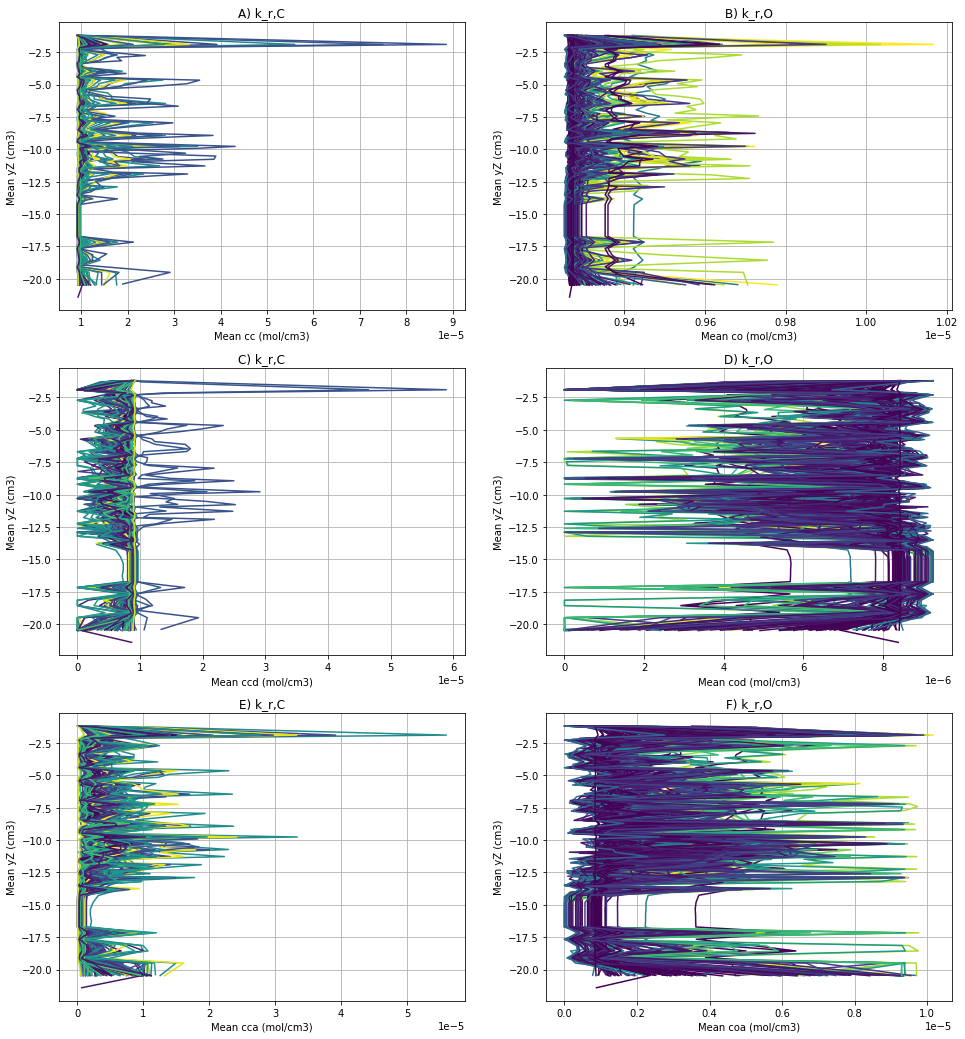

In [22]:
colvars = ['k_r,C','k_r,O','k_r,C','k_r,O','k_r,C','k_r,O',]
nrows = [1,1,2,2,3,3]
ncols = [1,2,1,2,1,2]
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cc','co','ccd','cod','cca','coa']):
    bin_and_plot(df, 'yZ', dep, 100,
                 3, 2, nn+1, 
                 doLog=False, colVar= colvars[nn])
plt.show()

In [20]:
chr(ord('@')+1)

'A'